# Bayesian Linear Regression 贝叶斯线性回归

Name: [Your name]

Skeleton framework for you to fill in (Code you need to provide is marked by `###`):

In [1]:
import scipy.io as sio
import numpy as np 
from numpy.linalg import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def BLR_train(Phi, y, beta=100, prior_mu_w=None, prior_cov_w=None):
    """
    Function: Calculate the expectation and covariance of posterior distribution
    Input:    
              Phi:              Design matrix of training data, size:[num_sample dimension]
              y:                Training Label, size: [num_sample 1]
              beta:             The precision of Gaussian random variables
              prior_mu_w:       The mean of conjugate prior distribution, size: [dimension 1]
              prior_cov_w:      The covariance of conjugate prior distribution, size: [dimension dimension]
    Output:   
              posterior_mu_w:   The expectation of posterior distribution
              posterior_cov_w:  The covariance of posterior distribution
    """
    m, d = Phi.shape 
    # The variable m is the number of the training data. 
    #The variable d is the dimension of the training data.
    if prior_mu_w == None:  prior_mu_w = np.zeros((d,1))
    if prior_cov_w == None: prior_cov_w = 0.1*np.eye(d)
    
    # your code. 
    # Here, you should calculate the expectation posterior_mu_w and the covariance posterior_cov_w of posterior distribution
    posterior_cov_w = ###
    posterior_mu_w = ###
    
    return posterior_mu_w, posterior_cov_w

In [3]:
def BLR_test(Phi, y, posterior_mu_w, posterior_cov_w, problem_type='regression', 
                  beta=100, sampling_size=1000, output_type='mode', retained_digit=0):
    """
    Function: Predict the testing data
    Input:
              Phi:              Design matrix of testing data
              y:                Testing Label
              posterior_mu_w:   The expectation of posterior distribution
              posterior_cov_w:  The covariance of posterior distribution
              problem_type:     The type of problem which you want to slove. Only regression and classification
              beta:             The precision of Gaussian random variables
              sampling_size:    The sampling size of weight w
              output_type:      There are three types of output
                   'mode':      The mode of each data prediction sequences
                   'mean':      The mean of each data prediction sequences 
                    'all':      Each intact data prediction sequences 
    Output:
              t:                Prediction of testing data
    """
    # your code
    # Here, You need to sample the weight w from its distribution and calculate the prediction of testing data.
    # You may use the function "np.random.multivariate_normal"  to sample the weight. 
    # If you don't know how to use the function, you can input "help(np.random.multivariate_normal)" or contact us.
    w = ###
    t = ###
    
    if output_type=='mean':
        t = np.mean(np.matmul(Phi, w.T),1)[:, np.newaxis]
    else:
        t = pd.DataFrame(np.round(t, retained_digit)).mode(1).as_matrix(columns=None)
        t = t[:,0:1]
    
    # Three kinds of errors
    er = t - y
    MSE = (er**2).mean()                      # Mean Squared Error
    MAE = abs(er).mean()                      # Average Absolute Error
    SD = np.sqrt((( er-er.mean())**2).mean()) # Error Standard Deviation
    
    if problem_type=='classification':
        acc = np.equal(np.round(t, retained_digit), y).mean() * 100
        text = "The Linear Regression's accuracy is %.2f%%." %(acc)
        print(text)
    
    obj = pd.Series([MSE,MAE,SD], index=['MSE','MAE','SD'])
    print(obj)
    
    if output_type=='all':
        return np.matmul(Phi, w.T)
    return t

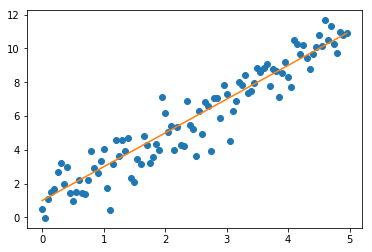

In [4]:
# Create data
w = np.array([[1.0], [2.0]])
x = np.arange(0,5,5/100)
x = np.column_stack( ((np.ones(100)) , x) )
true_y = np.dot(x, w)
noise_y = true_y + np.random.randn(100,1)
true_y = np.round(true_y, 2)

plt.plot(x[:,1], noise_y, 'o')
plt.plot(x[:,1], np.dot(x, w))
plt.show()

MSE    0.018161
MAE    0.115100
SD     0.071069
dtype: float64


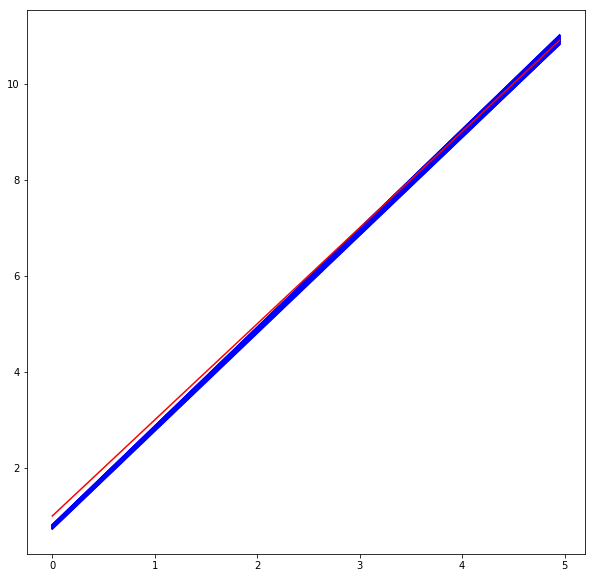

The blue lines are the image of  Bayesian Linear Regression estimated parameters. The red one is the true parameters.


In [5]:
posterior_mu_w, posterior_cov_w = BLR_train(x, noise_y)
t = BLR_test(x, true_y, posterior_mu_w, posterior_cov_w, sampling_size=100, output_type='all', retained_digit=2)
plt.figure(figsize=(10,10)) 
plt.plot(x[:,1], t, 'b')
plt.plot(x[:,1], np.dot(x, w), 'r')
plt.show()
print('The blue lines are the image of  Bayesian Linear Regression estimated parameters. The red one is the true parameters.')

In [6]:
# Import data
data_path = ### "The path where you store the SpectralClassification data" ###

data=sio.loadmat(data_path + "SpectralClassificationTrain.mat") 
train_x = data['train_x']
m, d = train_x.shape
train_x = np.column_stack( ((np.ones(m)).T , train_x) )
train_y = np.reshape(data['train_y'][:,0], [-1,1])

data=sio.loadmat(data_path + "SpectralClassificationTest.mat") 
test_x = data['test_x']
m, d = test_x.shape
test_x = np.column_stack( ((np.ones(m)).T , test_x) )
test_y = np.reshape(data['test_y'][:,0], [-1,1])

del data

In [7]:
posterior_mu_w, posterior_cov_w = BLR_train(train_x, train_y)
test_t = BLR_test(test_x, test_y, posterior_mu_w, posterior_cov_w, problem_type='classification')

The Linear Regression's accuracy is 83.00%.
MSE    0.240000
MAE    0.190000
SD     0.489796
dtype: float64
